## Preparing data

In [3]:
ls

medals.tsv                     toyproj_summer_olympics.ipynb


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
medals = pd.read_csv('medals.tsv', sep='\t')

In [5]:
medals.head()

,"List of medallists at the Games of the Olympiad per edition, sport, discipline, gender and event",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,DISCLAIMER: The IOC Research and Reference Ser...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal
4,Athens,1896,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100m freestyle,M,Gold


The first four rows are not relevant, we'll re-read the tsv file and skip them.

In [5]:
medals = pd.read_csv('medals.tsv', sep='\t', 
                     skiprows=[0, 1, 2, 3])
medals.head()

,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal
0,Athens,1896,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100m freestyle,M,Gold
1,Athens,1896,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100m freestyle,M,Silver
2,Athens,1896,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100m freestyle for sailors,M,Bronze
3,Athens,1896,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100m freestyle for sailors,M,Gold
4,Athens,1896,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100m freestyle for sailors,M,Silver


In [64]:
medals.tail()

,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal
29211,Beijing,2008,Wrestling,Wrestling Gre-R,"ENGLICH, Mirko",GER,Men,84 - 96kg,M,Silver
29212,Beijing,2008,Wrestling,Wrestling Gre-R,"MIZGAITIS, Mindaugas",LTU,Men,96 - 120kg,M,Bronze
29213,Beijing,2008,Wrestling,Wrestling Gre-R,"PATRIKEEV, Yuri",ARM,Men,96 - 120kg,M,Bronze
29214,Beijing,2008,Wrestling,Wrestling Gre-R,"LOPEZ, Mijain",CUB,Men,96 - 120kg,M,Gold
29215,Beijing,2008,Wrestling,Wrestling Gre-R,"BAROEV, Khasan",RUS,Men,96 - 120kg,M,Silver


Now the data is correctly loaded. From its columns we can see it's already in tidy shape. Let's see if there is any missing values.

In [6]:
medals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29216 entries, 0 to 29215
Data columns (total 10 columns):
City            29216 non-null object
Edition         29216 non-null int64
Sport           29216 non-null object
Discipline      29216 non-null object
Athlete         29216 non-null object
NOC             29216 non-null object
Gender          29216 non-null object
Event           29216 non-null object
Event_gender    29216 non-null object
Medal           29216 non-null object
dtypes: int64(1), object(9)
memory usage: 2.2+ MB


There's no missing values indicated by np.nan.   
However all columns are of "object" type, which might be unnecessary if there's limited levels in that column. Let's check it.

In [7]:
for col in medals.columns:
    print(col, '    ', medals[col].nunique())

City      22
Edition      26
Sport      42
Discipline      56
Athlete      21413
NOC      138
Gender      2
Event      577
Event_gender      3
Medal      3


We can cast some of the columns into "category" dtype. This can save us memory and allow some pandas operations to run faster.

In [8]:
to_convert = ['City', 'Sport','Discipline', 
              'NOC', 'Gender','Event_gender', 'Medal']

for col in to_convert:
    medals[col] = medals[col].astype('category')
    
medals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29216 entries, 0 to 29215
Data columns (total 10 columns):
City            29216 non-null category
Edition         29216 non-null int64
Sport           29216 non-null category
Discipline      29216 non-null category
Athlete         29216 non-null object
NOC             29216 non-null category
Gender          29216 non-null category
Event           29216 non-null object
Event_gender    29216 non-null category
Medal           29216 non-null category
dtypes: category(7), int64(1), object(2)
memory usage: 915.2+ KB


We can see that the memory usage is reduced by more than a half. Nice!

From the number of unique level of each column we can tell some more interesting information:  
* There's 26 editions of Summer Olympics, held by 22 cities. At most 4 cities held the big game more than one time.  
* There are 42 kinds of sport, 56 kinds of discipline, and 577 kinds of event. The number is increasing because the latter one is one form of the former one.  
* 21413 athletes are sharing 29216 medals, there are many who won multiple medals.  
* 22 cities but 138 NOC? It confuses me at first, but later I realize NOC might be representing the nationality of the athlete who won the medal, rather than the country held the game.   

I have thought of some questions we can look into:  
* Which city(cities) held Summer Olympic more than once?  
* Which NOC has the most medals in total? And by medal type?
* How's the distribution of number of athletes who won different amounts of medals looks like?
* Event_gender has 3 different values, is it a typo? Or some case where event_gender cannot be represented in male or female?
* What are the countries that won medals in most sports?
* During the Cold War(1952 - 1988), how did USA and USSR perform compared to each other?
* What is the general trend of number of medals each edition?

## Which city(cities) held Summer Olympic more than once?

In [10]:
md_by_city = medals.City.value_counts()

md_by_city.head(10)

Athens         2149
Los Angeles    2074
Beijing        2042
Sydney         2015
Atlanta        1859
Barcelona      1705
London         1618
Seoul          1546
Paris          1396
Moscow         1387
Name: City, dtype: int64

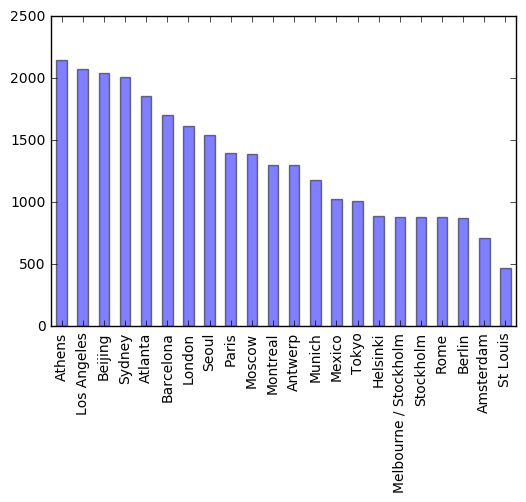

In [12]:
md_by_city.plot(kind='bar', alpha=0.5)

In [217]:
host_cities = medals[['City', 'Edition']].drop_duplicates().set_index('Edition')

In [223]:
host_cities['City'].value_counts().head()

Los Angeles    2
Athens         2
Paris          2
London         2
Tokyo          1
Name: City, dtype: int64

4 cities held Summer Olympics more than once, they are Athens(1896, 2004), London(1908, 1948), Los Angeles(1932, 1984) and Paris(1900, 1924).  


## Which NOC has the most medals in total? And by medal type?

In [23]:
medals.groupby('NOC')['Medal'].count().sort_values(ascending=False).head(10)

NOC
USA    4335
URS    2049
GBR    1594
FRA    1314
ITA    1228
GER    1211
AUS    1075
HUN    1053
SWE    1021
GDR     825
Name: Medal, dtype: int64

In [208]:
noc_by_mdtype = medals.pivot_table(index='NOC', 
                                   columns='Medal', 
                                   values='Athlete', 
                                   aggfunc='count'
                                )

noc_by_mdtype['total'] = noc_by_mdtype.sum(axis=1)

noc_by_mdtype = noc_by_mdtype.sort_values('total', ascending=False)

noc_by_mdtype.head(10)

Medal,Bronze,Gold,Silver,total
NOC,,,,
USA,1052.0,2088.0,1195.0,4335.0
URS,584.0,838.0,627.0,2049.0
GBR,505.0,498.0,591.0,1594.0
FRA,475.0,378.0,461.0,1314.0
ITA,374.0,460.0,394.0,1228.0
GER,454.0,407.0,350.0,1211.0
AUS,413.0,293.0,369.0,1075.0
HUN,345.0,400.0,308.0,1053.0
SWE,325.0,347.0,349.0,1021.0


## How's the distribution of number of athletes who won different amounts of medals looks like?

In [25]:
md_by_ath = medals.groupby('Athlete')['Medal'].count()

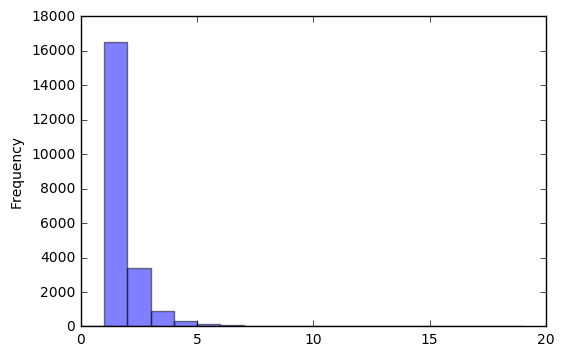

In [209]:
md_by_ath.plot(kind='hist',
               range=(0, 19),
               bins=19, 
               alpha=0.5)

## Event_gender has 3 different values, is the third kind a typo?   
Or some case where event_gender cannot be represented in male or female?

In [39]:
medals.Event_gender.unique()

[M, X, W]
Categories (3, object): [M, X, W]

In [40]:
medals.Event_gender.value_counts()

M    20067
W     7278
X     1871
Name: Event_gender, dtype: int64

In [226]:
md_by_gender = medals.groupby(['Event_gender', 'Gender'])['Medal'].count()
md_by_gender

Event_gender  Gender
M             Men       20067
W             Men           1
              Women      7277
X             Men        1653
              Women       218
Name: Medal, dtype: int64

There's only 1 observation where 'Event_gender' is 'W' and 'Gender' is 'Men'. Is this a typo?

In [227]:
medals[(medals['Gender']=='Men') & (medals['Event_gender']=='W')]

,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal
23675,Sydney,2000,Athletics,Athletics,"CHEPCHUMBA, Joyce",KEN,Men,marathon,W,Bronze


Do some google search we can find that "CHEPCHUMBA, Joyce" is a woman. The 'Gender' column for her is wrong.  
As when 'Event_gender' is 'X', there are many observations of men and women, what are these event? Are they sports that requires mixed gender?

In [228]:
eg_X = medals[medals['Event_gender']=='X']

print(eg_X['Sport'].unique())
print('\n')
print(eg_X['Discipline'].unique())
print('\n')
print(eg_X['Event'].unique())

[Equestrian, Sailing, Tennis, Skating, Shooting, Badminton]
Categories (6, object): [Equestrian, Sailing, Tennis, Skating, Shooting, Badminton]


[Jumping, Sailing, Tennis, Figure skating, Dressage, Eventing, Vaulting, Shooting, Badminton]
Categories (9, object): [Jumping, Sailing, Tennis, Figure skating, ..., Eventing, Vaulting, Shooting, Badminton]


['high jump' 'individual' 'long jump individual' '0.5-1t' '10-20t' '3-10t'
 'open class' 'mixed doubles' '12m' '6m' '7m' '8m' 'pairs' 'team' '10m'
 'mixed doubles indoor' 'figure riding individual' 'figure riding team'
 '10m (rating 1907)' '10m (rating 1919)' '12 foot dinghy'
 '12m (rating 1907)' '12m (rating 1919)' '18 foot dinghy' '30m sq' '40m sq'
 '6.5m (rating 1919)' '6m (rating 1907)' '8m (rating 1907)'
 'olympic class monotype' '12 foot dinghy individual'
 'two-person keelboat open (Star)' 'dragon' 'firefly class'
 'swallow (golondrina)' '5.5m' 'sharpie 12m2' 'flying dutchman'
 'fleet/match race keelboat open (Soling)' 'tempest'
 

Unfortunately I cannot find a codebook specifying what each column means.  
And I can't figure out why the 'Event_gender' column contains info of both male and female athletes

## What are the countries that won medals in most sports?

In [232]:
sp_by_noc = medals.groupby('NOC')['Sport'].nunique()

sp_by_noc.sort_values(ascending=False).head(10)

NOC
USA    34
GBR    31
FRA    28
GER    26
CHN    24
AUS    22
ESP    22
CAN    22
SWE    21
URS    21
Name: Sport, dtype: int64

## During the Cold War(1952 - 1988), how did USA and USSR perform compared to each other?

In [244]:
cold_war = medals.loc[(medals['Edition']>=1952)&(medals['Edition']<=1988)]


In [245]:
cold_war = cold_war.loc[(cold_war['NOC']=='USA')|(cold_war['NOC']=='URS')]


In [247]:
# medals won by the two country each year
cold_war.groupby(['Edition', 'NOC'])['Medal'].count()


Edition  NOC
1952     URS    117
         USA    130
1956     URS    169
         USA    118
1960     URS    169
         USA    112
1964     URS    174
         USA    150
1968     URS    188
         USA    149
1972     URS    211
         USA    155
1976     URS    285
         USA    155
1980     URS    442
1984     USA    333
1988     URS    294
         USA    193
Name: Medal, dtype: int64

In [12]:
# yearly winner in medals
md_pivot = medals.pivot_table(index = 'Edition', 
             columns = 'NOC', 
             values = 'Medal', 
             aggfunc = 'count')

md_cold_war = md_pivot.loc[1952:1989, ['USA', 'URS']]

md_cold_war.idxmax(axis=1)



Edition
1952    USA
1956    URS
1960    URS
1964    URS
1968    URS
1972    URS
1976    URS
1980    URS
1984    USA
1988    URS
dtype: object

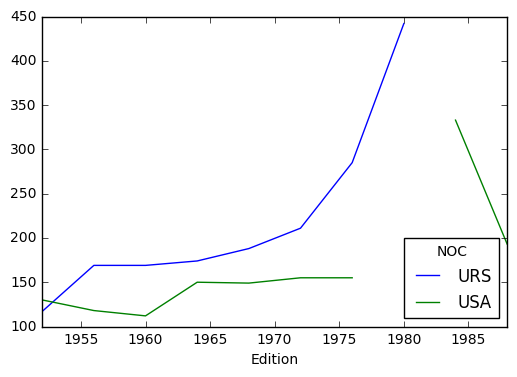

In [250]:
# total medals
cold_war.groupby(['Edition', 'NOC'])['Medal'].count().unstack('NOC').plot()


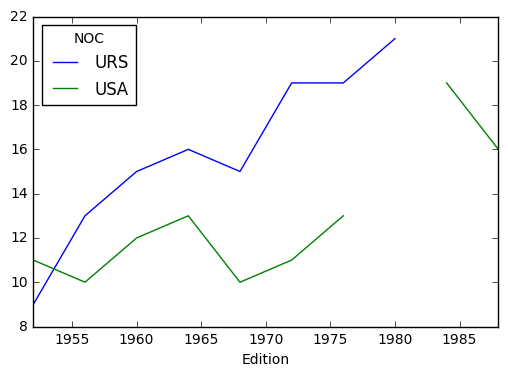

In [257]:
# unique sports that won medals
cold_war.groupby(['Edition', 'NOC'])['Sport'].nunique().unstack('NOC').plot()

In both total medals and medal-winning sports, the Soviet Union outperformed the United States during cold war.  Hard to imagine how the Soviet Union managed to do so under its poor economic condition.

## What is the general trend of number of medals each edition?

In [17]:
gr_edition = medals.groupby('Edition')


In [18]:
md_by_year = gr_edition['Medal'].count().sort_index()
md_by_year.head(10)

Edition
1896     151
1900     512
1904     470
1908     804
1912     885
1920    1298
1924     884
1928     710
1932     615
1936     875
Name: Medal, dtype: int64

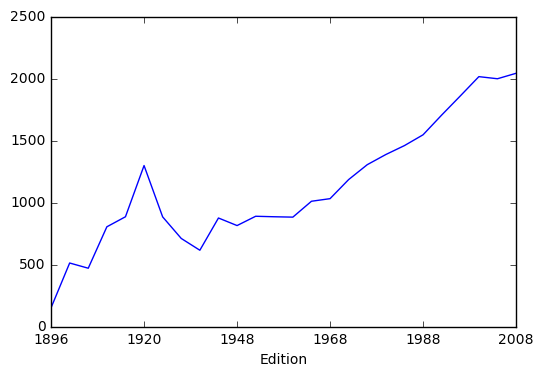

In [76]:
md_by_year.plot()


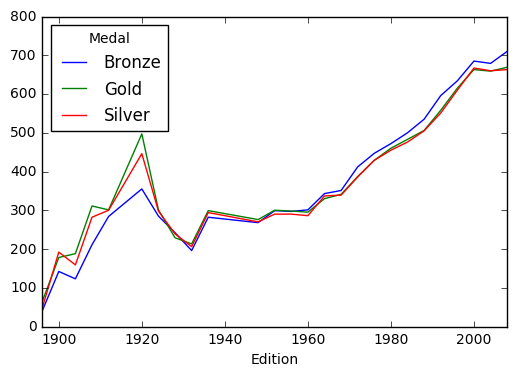

In [15]:
md_type_by_year = medals.pivot_table(index='Edition',
                                     columns='Medal', 
                                     values='Athlete', 
                                    aggfunc='count')
md_type_by_year.plot()

There's a sharp rise right before 1920 in all medal types, and then it quickly falls down. The trend of each type of medal appears the same as the grand trend. What happened?  
* One possible answer is that around 1920 there were many countries pop up to join the game therefore the total medals won increased; then after 1920 some countries quitted.
* Another possibility is around 1920 each country won more medals on average.  
  
  
Let's check this by plotting average medal won by each country each edition.


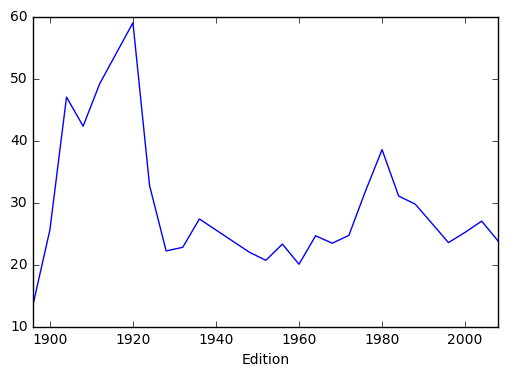

In [27]:
avg_md_by_noc.plot()

Ha? From 1904 to 1920, on average, each country won a surprisingly high amount of medal compared to other time in history. We know World War I happened during 1914 to 1918, it should be a period with great loss in every aspect, how come the triumph in Olympics?  
  
Let's take a look into the main roles of WWI to see their performance.  
The Allied Powers consist of France, British Empire, Russian Empire(until 1917), Serbia, Montenegro, Belgium, Japan, Italy, Portugal, Romania, Hejaz, United States, Greece and Thailand Siam. And the Central Power consist of Germany, Austria-Hungary, Ottoman Empire and Bulgaria. (source:[WikiPedia](https://en.wikipedia.org/wiki/World_War_I))

In [28]:
allied = ['FRA', 'GBR', 'URS', 'SCG', 'BEL','JPN','ITA','POR', 'ROU','USA','GRE','THA']
central = ['GER', 'AUT', 'HUN', 'BUL']

This list is a little problematic, for some countries do not exist now and don't have a NOC code(e.g. Ottoman Empire, Russian Empire), and some NOC code do not reflect the exact same country in WWI(e.g. 'GER' is Germany for now). But I just list them here, later peel off the NaN columns.

In [45]:
# medal records for Allied Powers
md_allied = md_pivot.loc[1904:1932, allied].dropna(how='all', axis=1)
md_allied

NOC,FRA,GBR,BEL,JPN,ITA,POR,ROU,USA,GRE
Edition,,,,,,,,,
1904,NaN,2.0,NaN,NaN,NaN,NaN,NaN,394.0,2.0
1908,35.0,347.0,31.0,NaN,7.0,NaN,NaN,63.0,3.0
1912,25.0,160.0,19.0,NaN,21.0,NaN,NaN,101.0,2.0
1920,141.0,107.0,188.0,3.0,84.0,NaN,NaN,193.0,5.0
1924,122.0,66.0,38.0,1.0,51.0,3.0,23.0,198.0,NaN
1928,36.0,55.0,5.0,8.0,70.0,NaN,NaN,84.0,NaN
1932,37.0,34.0,NaN,31.0,77.0,NaN,NaN,181.0,NaN


In [51]:
md_allied.sum(axis=1).div(md_by_year.loc[1904:1932])

Edition
1904    0.846809
1908    0.604478
1912    0.370621
1920    0.555470
1924    0.567873
1928    0.363380
1932    0.585366
dtype: float64

France, Belgium, Italy and USA had a major increase in medals, around 1920, and except 1912, these countries won more than half of the total medals!

In [46]:
# medal records for Central Powers
md_central = md_pivot.loc[1904:1932, central].dropna(how='all', axis=1)
md_central

NOC,GER,AUT,HUN
Edition,,,
1904,13.0,1.0,4.0
1908,22.0,1.0,18.0
1912,52.0,14.0,30.0
1920,NaN,NaN,NaN
1924,NaN,4.0,20.0
1928,72.0,4.0,20.0
1932,38.0,5.0,32.0
